# Analyse d'une base de données des clients d'un grossiste 

## Présentation de la base de données

__L'ensemble de données comprend 6 variables sur 440 clients. Les valeurs sont quantitatives et sont les suivantes:__

- Fresh: dépenses annuelles en produits frais
- Milk: dépenses annuelles en produits laitiers
- Grocery: dépenses annuelles en produits d'épicerie
- Frozen: dépenses annuelles en produits surgelés
- Detergents_paper: dépenses annuelles en détergents et produits en papier
- Delicassen: dépenses annuelles en produits d'épicerie fine

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import des données
data = pd.read_excel('MT15_exam_acp_classification.xls')
data.head()

Unnamed: 0  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0   Client 1  12669  9656     7561     214              2674        1338
1   Client 2   7057  9810     9568    1762              3293        1776
2   Client 3   6353  8808     7684    2405              3516        7844
3   Client 4  13265  1196     4221    6404               507        1788
4   Client 5  22615  5410     7198    3915              1777        5185

## Enoncé

__1. Extraire les données quantitatives et présenter une synthèse des données.__

__2. Analyse ACP:__
   - Effectuer une analyse ACP avec deux dimensions, afficher les valeurs propres et les ratios de variance expliquée par chaque composante. 
   - Quelle quantité d'information est préservée dans ce cas ?
   - Afficher le graphique des individus et analyser.
   - Utiliser les métriques, que suggèrent chacune par rapport au nombre de dimensions à garder ? (justifier le raisonnement)
   - Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des            facteurs que vous avez gardés, et analyser.
   - Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les      facteurs que avez gardés et analyser.
   
__3. Classification__
   - Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre de classe à retenir (justifier le raisonnement).
   - Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH. 
   - Que suggère la métrique silhouette concernant le nombre de classes K-means ? (justifier le raisonnement)
   - Comparer les classes obtenues avec la CAH et les classes obtenues par K-means, analyser.
   - Etudier les classes obtenues par K-means, analyser les propriétés des clients qui composent chacune des classes.   

In [4]:
# question 2 

In [20]:
x = data.iloc[:,1:7].values
x

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [21]:
from sklearn.decomposition import PCA as sklearnPCA

In [22]:
pca = sklearnPCA(n_components = 2)

In [23]:
principalComponents = pca.fit_transform(x)

In [24]:
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

Axe principal 1  Axe principal 2
0       650.022122      1585.519090
1     -4426.804979      4042.451509

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
cr = StandardScaler().fit_transform(x)
cr

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [35]:
from sklearn.decomposition import PCA

acp = PCA(svd_solver='full')
coord = acp.fit_transform(cr)
n = (acp.n_components_)

variance = acp.explained_variance_
eigval = variance*(len(cr)-1)/len(cr)
print(eigval)

[2.64497357 1.70258397 0.74006477 0.56373023 0.28567634 0.06297111]


In [36]:
print([ratio for ratio in acp.explained_variance_ratio_])

[0.44082892881128055, 0.2837639952661693, 0.12334412896786455, 0.09395503752971497, 0.04761272400688682, 0.010495185418083766]


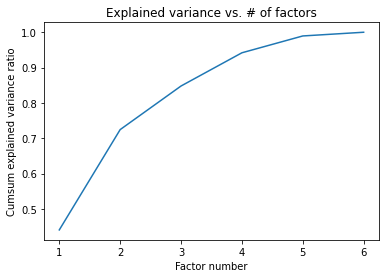

In [38]:
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [39]:
# Nous pouvons voir dans cette première partie d'analyse que la quantité d'information préservée 

<AxesSubplot:xlabel='Axe principal 1', ylabel='Axe principal 2'>

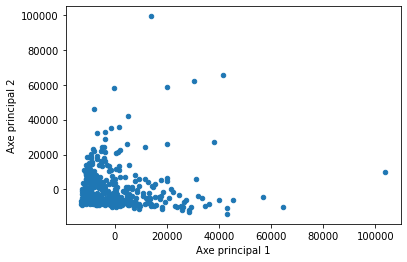

In [40]:
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

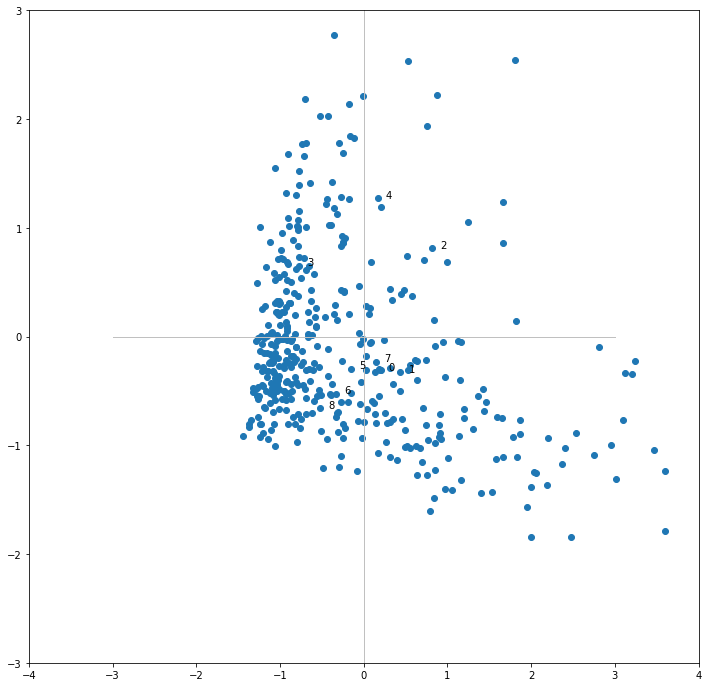

In [56]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4)
axes.set_ylim(-3,3)

plt.scatter(coord[:,0],coord[:,1])

for i in range(9):
     plt.annotate(data.index[i],(coord[i,0]+0.1,coord[i,1]))

plt.plot([-3,3],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.show()

In [41]:
# Nous pouvons voir que la majorité des individus se trouvent aux mêmes endroit. Nous avons donc un seul et unique
# groupe. Seul quelque individu sont éloigné du groupe. 

In [58]:
bs = 1/np.arange(n,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [59]:
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    2.644974  2.450000
1    1.702584  1.450000
2    0.740065  0.950000
3    0.563730  0.616667
4    0.285676  0.366667
5    0.062971  0.166667


In [60]:
# Le bon nombre de dim à garder est 1 puisque dès le premiere dim nous avons un chiffre supérieur à 1

In [64]:
di = np.sum(cr**2,axis=1)
print(pd.DataFrame({'ID':data.index,'d_i':di}))

      ID        d_i
0      0   0.632268
1      1   0.566947
2      2   5.436559
3      3   1.283337
4      4   2.487360
..   ...        ...
435  435   8.093296
436  436   6.084971
437  437  13.899635
438  438   1.195152
439  439   2.082350

[440 rows x 2 columns]


In [42]:
#Question 3 

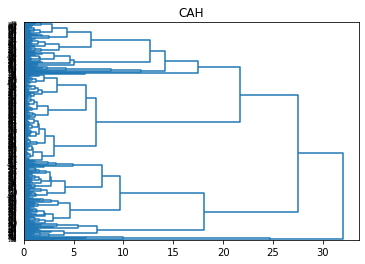

In [44]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z = linkage(cr,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(Z,labels=data.index,orientation='right',color_threshold=0)
plt.show()

In [ ]:
# Il faut retenir 4 classes 

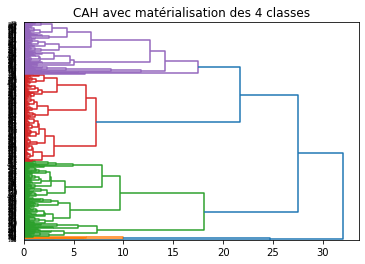

In [55]:
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=data.index,orientation='right',color_threshold=20)
plt.show()